## RBM Introduction

- Is a type of unsupervised Neural network

## Implementation

There are 4 functions, 1st is to initialize the class, 2nd function is to sample the probabilities of hidden nodes given visible nodes, and 3rd function is to sample the probabilities of visible nodes given hidden nodes, the final one is to train the model.

In [1]:
# importing libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit   # sigmoid
from time import time
from RBM import RBM

In [2]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images-idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width*height ] )

    labels = np.fromfile( folder + "/" + prefix + '-labels-idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

def get_batches(data, batch_size):
    if(batch_size == -1):
        batch_size = len(data)
    num_batches = math.ceil(data.shape[0]/batch_size)
    for batch_num in range(num_batches):
        yield data[batch_num*batch_size:(batch_num+1)*batch_size]

In [3]:
# Note: X - trainingImages, X_test - testImages, y - trainingLabels, y_test - testLabels
trainingImages, trainingLabels = loadMNIST( "train", "data" )
testImages, testLabels = loadMNIST( "t10k", "data" )
trainingImages = trainingImages/255

In [4]:
# Some parameters to set
batch_size = 20
num_epochs = 20
lr = 0.1
#batchMnist = prepare_batches(trainingImages,batch_size)

In [5]:
# Our RBM object
mnistRbm = RBM(visibleLayers=784, hiddenLayers=100)

In [6]:

# Some hand picked images for each class for plotting
selected_imgs = trainingImages[[1, 6, 5, 12, 26, 35, 62, 52, 46, 4]]

In [7]:
# Model training data
errors = []
start_time = time()

In [8]:
# Training loop
errors = []
weightsIteration = []
for epoch in range(1, num_epochs+1):
    iteration = 0
    error = 0
    for batch in get_batches(trainingImages, batch_size):
        iteration += 1
       # Compute gradients and errors
        error += mnistRbm.compute_error_and_grads(batch)
        # Update parameters - use momentum as explained in Hinton's guide
        mnistRbm.update_params(lr)
    weightsIteration.append(mnistRbm.vhW)
    print("epoch:{} \t error:{:.4f} \t training time:{:.2f} s".format(epoch, error, iteration))
    errors.append(error)

epoch:1 	 error:55746.4996 	 training time:3000.00 s
epoch:2 	 error:39522.6169 	 training time:3000.00 s
epoch:3 	 error:36942.2929 	 training time:3000.00 s
epoch:4 	 error:35730.3225 	 training time:3000.00 s
epoch:5 	 error:34954.3745 	 training time:3000.00 s
epoch:6 	 error:34394.8576 	 training time:3000.00 s
epoch:7 	 error:33932.3191 	 training time:3000.00 s
epoch:8 	 error:33597.7642 	 training time:3000.00 s
epoch:9 	 error:33252.1692 	 training time:3000.00 s
epoch:10 	 error:32973.4381 	 training time:3000.00 s
epoch:11 	 error:32705.0242 	 training time:3000.00 s
epoch:12 	 error:32551.1876 	 training time:3000.00 s
epoch:13 	 error:32367.9614 	 training time:3000.00 s
epoch:14 	 error:32209.1711 	 training time:3000.00 s
epoch:15 	 error:32084.4689 	 training time:3000.00 s
epoch:16 	 error:31995.8917 	 training time:3000.00 s
epoch:17 	 error:31877.9628 	 training time:3000.00 s
epoch:18 	 error:31806.3372 	 training time:3000.00 s
epoch:19 	 error:31696.2524 	 trainin

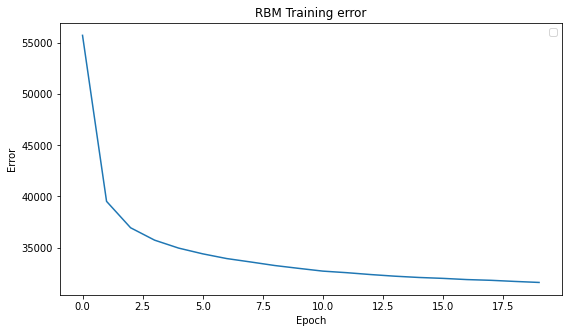

In [11]:
plt.figure(figsize=(9,5))
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('RBM Training error')
plt.legend(['training'], loc='best')
plt.plot(errors)
plt.savefig("error_plot")

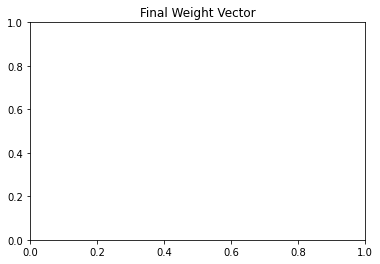

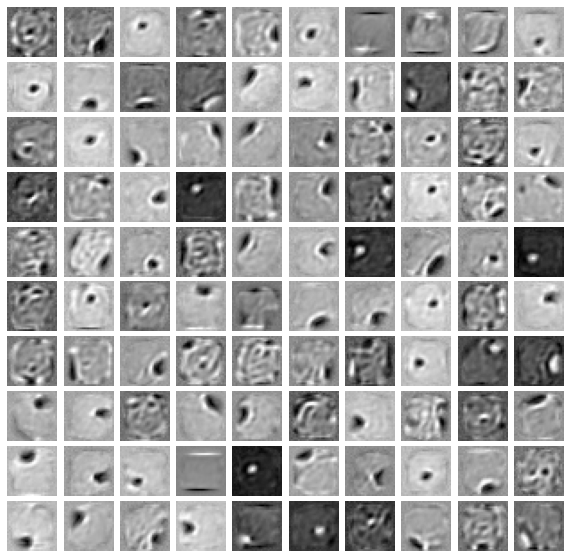

In [12]:
# our weight vector is
mnistRbm.plot_weights(mnistRbm.vhW,"finalWeight")

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

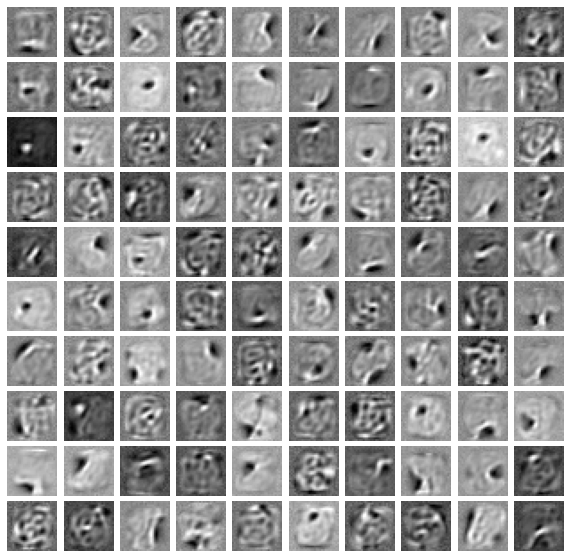

In [10]:

for i in range(len(weightsIteration)):
    mnistRbm.plot_weights(weightsIteration[i],"weights/iterationWeight_{0}".format(i+1))


#### Now we got our weight and bias of our Model. We can encode all the images using our activation of the hidden neuron

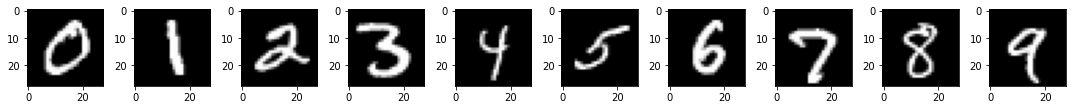

In [88]:
recontructingImages(mnistRbm, selected_imgs)

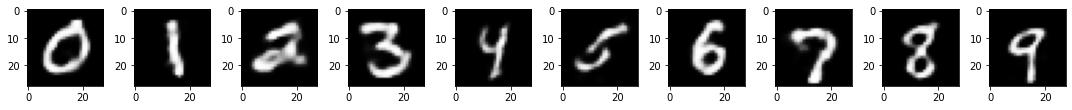

In [102]:
recontructingImages(mnistRbm, selected_imgs)

In [85]:

def recontructingImages(mnistRbm, images):
    
    num_samples = len(images)
    plt.clf()
    fig, axes = plt.subplots(3, num_samples, gridspec_kw = {'wspace':0, 'hspace':0.1}, figsize=(2*num_samples, 4))
    fig.suptitle("Original, Hidden and Reconstructed Images")
    text = axes[0, 0].text(-7, 14,"original", size=15,
                           verticalalignment='center', rotation=-270)
    text = axes[1, 0].text(-3, 5,"Hidden", size=15,
                           verticalalignment='center', rotation=-270)
    text = axes[2, 0].text(-7, 12,"Reconstr", size=15,
                           verticalalignment='center', rotation=-270)
    for n in range(num_samples):
        visble, hidden = mnistRbm.reconstruct(images[n].reshape(28*28))
        axes[0, n].imshow(images[n].reshape(28, 28), cmap='gray')
        axes[1, n].imshow(hidden.reshape(10, 10), cmap='gray')
        axes[2, n].imshow(visble.reshape(28, 28), cmap='gray')
        axes[0, n].axis('off')
        axes[1, n].axis('off')
        axes[2, n].axis('off')

    plt.savefig("weightMatrix")
    plt.show()

In [47]:
selected_imgs.shape

(10, 784)

In [101]:

def recontructingImages(mnistRbm, images):
  num_row = 1
  num_col = 10
  num_samples = len(images)
  # plot images
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i in range(num_samples):
      visble, hidden = mnistRbm.reconstruct(images[i].reshape(28*28))
      ax = axes[i%num_col]
      ax.imshow(visble.reshape(28,28), cmap='gray')
  plt.tight_layout()
  plt.show()

## SVM Simple classifier

In [14]:

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import pandas as pd

In [15]:
# Encoding the representation
encoding = []
for i in range(len(trainingImages)):
    pdH, hiddenSampled = mnistRbm.posetivePhase(trainingImages[i].reshape(28*28))
    encoding.append(hiddenSampled)
encodedDfx = pd.DataFrame(encoding)

In [16]:
encodedDfx.shape

(60000, 100)

In [17]:
trainingLabels.shape

(60000,)

In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(encodedDfx, trainingLabels, train_size=0.2,test_size = 0.8, random_state = 101)

In [19]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (12000, 100)
y_train shape: (12000,)
X_test shape: (48000, 100)
y_test shape: (48000,)


In [20]:
# svc model
model_linear = SVC(C=20, gamma=0.01, kernel="rbf")
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

In [21]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9413541666666667 

[[4598    0   23   15    3   14   29    0   30    9]
 [   1 5307   23   10    4    5    5   10   12   11]
 [  16   23 4524   34   19    7   18   46   41   10]
 [  17   22   80 4504    1  132    7   48   79   36]
 [   6   20   36   12 4350    6   34   25   20  172]
 [  34   21   22  111   16 3976   63    5   51   30]
 [  37   18   23    8   17   44 4595    0   16    0]
 [  10   30   45   37   40    9    0 4750   12  101]
 [  20   64   61   90   27   84   38   25 4205   51]
 [  11   13   11   47  126   25    3  110   38 4376]]


In [22]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4721
           1       0.96      0.98      0.97      5388
           2       0.93      0.95      0.94      4738
           3       0.93      0.91      0.92      4926
           4       0.95      0.93      0.94      4681
           5       0.92      0.92      0.92      4329
           6       0.96      0.97      0.96      4758
           7       0.95      0.94      0.94      5034
           8       0.93      0.90      0.92      4665
           9       0.91      0.92      0.92      4760

    accuracy                           0.94     48000
   macro avg       0.94      0.94      0.94     48000
weighted avg       0.94      0.94      0.94     48000



In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

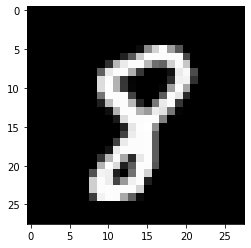

In [24]:
plt.imshow(trainingImages[94].reshape(28, 28), cmap='gray')
plt.show()

### NN With  softmax layer

In [52]:
import keras
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt


In [53]:

# X_train, X_test, y_train, y_test 

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [54]:
image_size = 100 # 10*10
num_classes = 10 # ten unique digits

model = Sequential()
# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=50, activation='sigmoid',kernel_initializer='uniform', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 5,560
Trainable params: 5,560
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=250, verbose=True, validation_split=.1,)
loss, accuracy  = model.evaluate(X_test, y_test, verbose=True)


===============] - 0s 2ms/step - loss: 0.4935 - acc: 0.8793 - val_loss: 0.4794 - val_acc: 0.8775
Epoch 102/250
85/85 [==============================] - 0s 2ms/step - loss: 0.4907 - acc: 0.8795 - val_loss: 0.4768 - val_acc: 0.8783
Epoch 103/250
85/85 [==============================] - 0s 2ms/step - loss: 0.4880 - acc: 0.8803 - val_loss: 0.4743 - val_acc: 0.8775
Epoch 104/250
85/85 [==============================] - 0s 4ms/step - loss: 0.4854 - acc: 0.8806 - val_loss: 0.4717 - val_acc: 0.8792
Epoch 105/250
85/85 [==============================] - 0s 3ms/step - loss: 0.4828 - acc: 0.8804 - val_loss: 0.4692 - val_acc: 0.8800
Epoch 106/250
85/85 [==============================] - 0s 2ms/step - loss: 0.4803 - acc: 0.8809 - val_loss: 0.4669 - val_acc: 0.8808
Epoch 107/250
85/85 [==============================] - 0s 4ms/step - loss: 0.4778 - acc: 0.8818 - val_loss: 0.4643 - val_acc: 0.8808
Epoch 108/250
85/85 [==============================] - 0s 5ms/step - loss: 0.4754 - acc: 0.8817 - val_los

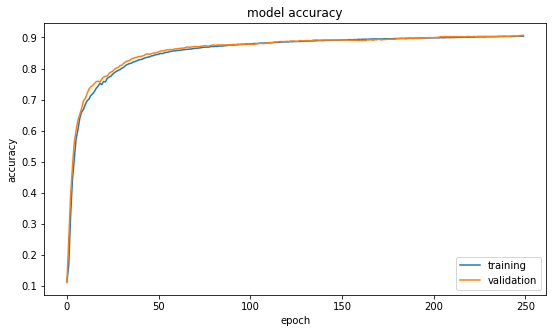

In [56]:
plt.figure(figsize=(9,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [49]:
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.414
Test accuracy: 0.887


## Hyperparameter search For SVM

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [60]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1,10,20,50,100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 20, 50, 100],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [61]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.533204,0.286067,7.439987,0.364668,1,0.01,"{'C': 1, 'gamma': 0.01}",0.931250,0.920833,0.918333,...,0.923833,0.004783,5,0.944688,0.944479,0.946042,0.943333,0.942813,0.944271,0.001128
1,20.519351,2.125333,12.814413,0.846442,1,0.001,"{'C': 1, 'gamma': 0.001}",0.904583,0.885833,0.890833,...,0.895333,0.006505,13,0.896979,0.902813,0.902500,0.900208,0.900208,0.900542,0.002093
2,47.926695,2.879957,17.050167,1.310895,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.737083,0.741667,0.737917,...,0.742500,0.004751,15,0.730521,0.759583,0.750417,0.743750,0.751667,0.747188,0.009734
3,7.505527,0.244081,6.234544,0.221112,10,0.01,"{'C': 10, 'gamma': 0.01}",0.942917,0.938333,0.924167,...,0.936583,0.006430,4,0.988125,0.988229,0.988646,0.988646,0.987187,0.988167,0.000534
4,8.652447,0.362745,7.309271,0.213241,10,0.001,"{'C': 10, 'gamma': 0.001}",0.919583,0.910000,0.905833,...,0.914000,0.005340,9,0.929896,0.931667,0.931354,0.930104,0.930417,0.930688,0.000699
5,20.456132,0.688742,12.819367,0.465189,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.902500,0.885000,0.890833,...,0.893917,0.005819,14,0.896146,0.902604,0.902083,0.899792,0.899479,0.900021,0.002293
6,6.718588,0.900105,5.721518,0.688198,20,0.01,"{'C': 20, 'gamma': 0.01}",0.941667,0.938333,0.930000,...,0.937750,0.004079,1,0.996667,0.997500,0.997604,0.996979,0.996250,0.997000,0.000508
7,6.194054,0.177860,5.741695,0.162941,20,0.001,"{'C': 20, 'gamma': 0.001}",0.920833,0.915833,0.909167,...,0.916250,0.004362,8,0.937292,0.939896,0.940312,0.938333,0.939063,0.938979,0.001085
8,13.793855,0.472417,10.033075,0.658817,20,0.0001,"{'C': 20, 'gamma': 0.0001}",0.912500,0.890833,0.897917,...,0.902250,0.007414,12,0.907083,0.911042,0.910833,0.909167,0.909583,0.909542,0.001422
9,7.565691,0.313756,6.466146,0.302151,50,0.01,"{'C': 50, 'gamma': 0.01}",0.940000,0.936667,0.930000,...,0.936750,0.003731,2,1.000000,0.999896,0.999896,0.999896,0.999896,0.999917,0.000042
